<a href="https://colab.research.google.com/github/potdarjs/Python-Codes/blob/master/Outlier_PyOD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Outliers PyOD

In [4]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving bigmart_train.csv to bigmart_train.csv
Saving bigmart_test.csv to bigmart_test.csv
User uploaded file "bigmart_train.csv" with length 869537 bytes
User uploaded file "bigmart_test.csv" with length 527709 bytes


PyOD is one such library to detect outliers in your data. It provides access to more than 20 different algorithms to detect outliers and is compatible with both Python 2 and 3. Awesome

pip install pyod

## Table of Contents

What is an Outlier?

Why do we need to detect Outliers?

Why should we use PyOD for Outlier Detection?

Features of the PyOD library

Installing PyOD in Python

Some Outlier Detection Algorithms used in PyOD

Extra Utilities provided by PyOD

Implementation of PyoD in Python

###What is an Outlier?\

An outlier is any data point which differs greatly from the rest of the observations in a dataset. Let’s see some real life examples to understand outlier detection:


When one student averages over 90% while the rest of the class is at 70% – a clear outlier
While analyzing a certain customer’s purchase patterns, it turns out there’s suddenly an entry for a very high value. While most of his/her transactions fall below Rs. 10,000, this entry is for Rs. 1,00,000. It could be an electronic item purchase – whatever the reason, it’s an outlier in the overall data
How about Usain Bolt? Those record breaking sprints are definitely outliers when you factor in the majority of athletes

### Why do we need to Detect Outliers?

Outliers can impact the results of our analysis and statistical modeling in a drastic way. Check out the below image to visualize what happens to a model when outliers are present versus when they have been dealt with
But here’s the caveat – outliers aren’t always a bad thing. It’s very important to understand this. Simply removing outliers from your data without considering how they’ll impact the results is a recipe for disaster.

https://pyod.readthedocs.io/en/latest/

### Outlier Detection Algorithms used in PyOD''

Let’s see the outlier detection algorithms that power PyOD. It’s well and good implementing PyOD but I feel it’s equally important to understand how it works underneath. This will give you more flexibility when you’re using it on a dataset.

Note: We will be using a term Outlying score in this section. It means every model, in some way, scores a data point than uses threshold value to determine whether the point is an outlier or not.

 

###Angle-Based Outlier Detection (ABOD)

It considers the relationship between each point and its neighbor(s). It does not consider the relationships among these neighbors. The variance of its weighted cosine scores to all neighbors could be viewed as the outlying score
ABOD performs well on multi-dimensional data
PyOD provides two different versions of ABOD:
Fast ABOD: Uses k-nearest neighbors to approximate
Original ABOD: Considers all training points with high-time complexity
 

###k-Nearest Neighbors Detector

For any data point, the distance to its kth nearest neighbor could be viewed as the outlying score
PyOD supports three kNN detectors:
Largest: Uses the distance of the kth neighbor as the outlier score
Mean: Uses the average of all k neighbors as the outlier score
Median: Uses the median of the distance to k neighbors as the outlier score
 

###Isolation Forest

It uses the scikit-learn library internally. In this method, data partitioning is done using a set of trees. Isolation Forest provides an anomaly score looking at how isolated the point is in the structure. The anomaly score is then used to identify outliers from normal observations
Isolation Forest performs well on multi-dimensional data
 

###Histogram-based Outlier Detection

It is an efficient unsupervised method which assumes the feature independence and calculates the outlier score by building histograms
It is much faster than multivariate approaches, but at the cost of less precision
 

###Local Correlation Integral (LOCI)
LOCI is very effective for detecting outliers and groups of outliers. It provides a LOCI plot for each point which summarizes a lot of the information about the data in the area around the point, determining clusters, micro-clusters, their diameters, and their inter-cluster distances
None of the existing outlier-detection methods can match this feature because they output only a single number for each point
 

###Feature Bagging
A feature bagging detector fits a number of base detectors on various sub-samples of the dataset. It uses averaging or other combination methods to improve the prediction accuracy
By default, Local Outlier Factor (LOF) is used as the base estimator. However, any estimator could be used as the base estimator, such as kNN and ABOD
Feature bagging first constructs n sub-samples by randomly selecting a subset of features. This brings out the diversity of base estimators. Finally, the prediction score is generated by averaging or taking the maximum of all base detectors
 

###Clustering Based Local Outlier Factor
It classifies the data into small clusters and large clusters. The anomaly score is then calculated based on the size of the cluster the point belongs to, as well as the distance to the nearest large cluster
 

###Extra Utilities provided by PyOD
A function generate_data can be used to generate random data with outliers. Inliers data is generated by a multivariate Gaussian distribution and outliers are generated by a uniform distribution.
We can provide our own values of outliers fraction and the total number of samples that we want in our dataset. We will use this utility function to create data in the implementation part.
 

###Implementation of PyOD
Enough talk – let’s see some action. In this section, we’ll implement the PyOD library in Python. I’m going to use two different approaches to demonstrate PyOD:

Using a simulated dataset
Using a real-world dataset – The Big Mart Sales Challenge
 

In [0]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager

In [0]:
df=pd.read_csv("bigmart_train.csv")

In [10]:
pip install pyod

In [8]:
pip install --upgrade pyod  # to make sure that the latest version is installed!

     |████████████████████████████████| 92kB 3.1MB/s 
  Stored in directory: /root/.cache/pip/wheels/1e/50/43/3a064ff929d3095f5625ac1ddd44674a6fd75b82b3ace60bdf
Successfully built pyod


In [11]:
import pyod
from pyod.models.abod import ABOD
from pyod.models.knn import KNN

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


## PyOD on a Simulated Dataset

Text(0, 0.5, 'F2')

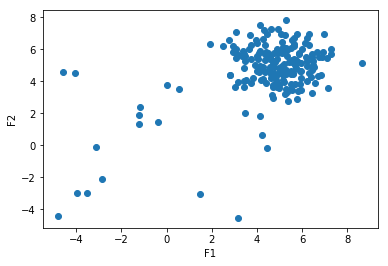

In [13]:
from pyod.utils.data import generate_data, get_outliers_inliers

#generate random data with two features
X_train, Y_train = generate_data(n_train=200,train_only=True, n_features=2)

# by default the outlier fraction is 0.1 in generate data function 
outlier_fraction = 0.1

# store outliers and inliers in different numpy arrays
x_outliers, x_inliers = get_outliers_inliers(X_train,Y_train)

n_inliers = len(x_inliers)
n_outliers = len(x_outliers)

#separate the two features and use it to plot the data 
F1 = X_train[:,[0]].reshape(-1,1)
F2 = X_train[:,[1]].reshape(-1,1)

# create a meshgrid 
xx , yy = np.meshgrid(np.linspace(-10, 10, 200), np.linspace(-10, 10, 200))

# scatter plot 
plt.scatter(F1,F2)
plt.xlabel('F1')
plt.ylabel('F2') 

### Create a dictionary and add all the models that you want to use to detect the outliers:

In [0]:
classifiers = {
     'Angle-based Outlier Detector (ABOD)'   : ABOD(contamination=outlier_fraction),
     'K Nearest Neighbors (KNN)' :  KNN(contamination=outlier_fraction)
}

### Fit the data to each model we have added in the dictionary, Then, see how each model is detecting outliers:

No. of Error :  Angle-based Outlier Detector (ABOD) 10
No. of Error :  K Nearest Neighbors (KNN) 2


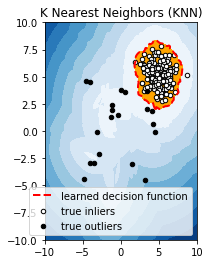

In [15]:
# set the figue size
# plt.figure(figszie=(5,15))

for i, (clf_name,clf) in enumerate(classifiers.items()):
  
  clf.fit(X_train) # fit the datset to the model
  
  scores_pred= clf.decision_function(X_train)*-1 # predict raw anomaly score
  
  y_pred = clf.predict(X_train) #prediction of a datapoint category outlier or inlier
  
  n_errors = (y_pred != Y_train).sum() # no of errors in prediction
  print('No. of Error : ', clf_name, n_errors)
  
  # ====================================================================================
  # rest of the code is to create the visualization

    # threshold value to consider a datapoint inlier or outlier
    
threshold = stats.scoreatpercentile(scores_pred,100 *outlier_fraction)

    # decision function calculates the raw anomaly score for every point
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
Z = Z.reshape(xx.shape)

subplot = plt.subplot(1, 2, i + 1)

    # fill blue colormap from minimum anomaly score to threshold value
subplot.contourf(xx, yy, Z, levels = np.linspace(Z.min(), threshold, 10),cmap=plt.cm.Blues_r)

    # draw red contour line where anomaly score is equal to threshold
a = subplot.contour(xx, yy, Z, levels=[threshold],linewidths=2, colors='red')

    # fill orange contour lines where range of anomaly score is from threshold to maximum anomaly score
subplot.contourf(xx, yy, Z, levels=[threshold, Z.max()],colors='orange')

    # scatter plot of inliers with white dots
b = subplot.scatter(X_train[:-n_outliers, 0], X_train[:-n_outliers, 1], c='white',s=20, edgecolor='k') 
    # scatter plot of outliers with black dots
c = subplot.scatter(X_train[-n_outliers:, 0], X_train[-n_outliers:, 1], c='black',s=20, edgecolor='k')
subplot.axis('tight')

subplot.legend(
        [a.collections[0], b, c],
        ['learned decision function', 'true inliers', 'true outliers'],
        prop=matplotlib.font_manager.FontProperties(size=10),
        loc='lower right')

subplot.set_title(clf_name)
subplot.set_xlim((-10, 10))
subplot.set_ylim((-10, 10))
plt.show() 
  
  

## PyOD on the Big Mart Sales Problem

In [0]:
# Import models
from pyod.models.abod import ABOD
from pyod.models.cblof import CBLOF
from pyod.models.feature_bagging import FeatureBagging
from pyod.models.hbos import HBOS
from pyod.models.iforest import IForest
from pyod.models.knn import KNN
from pyod.models.lof import LOF

### Let’s plot Item MRP vs Item Outlet Sales to understand the data:

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


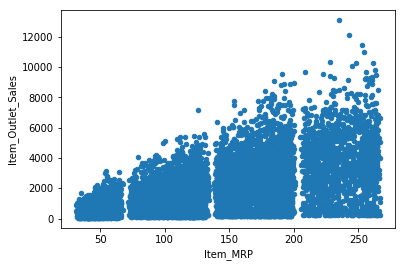

In [18]:
df.plot.scatter('Item_MRP','Item_Outlet_Sales')

The range of Item Outlet Sales is from 0 to 12000 and Item MRP is from 0 to 250. We will scale down both these features to a range between 0 and 1. This is required to create a explainable visualization (it will become way too stretched otherwise). As for this data, using the same approach will take much more time to create the visualization.

In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))
df[['Item_MRP', 'Item_Outlet_Sales']] = scaler.fit_transform(df[['Item_MRP','Item_Outlet_Sales']])
df[['Item_MRP', 'Item_Outlet_Sales']].head()

,Item_MRP,Item_Outlet_Sales
0,0.927507,0.283587
1,0.072068,0.031419
2,0.468288,0.158115
3,0.640093,0.053555
4,0.095805,0.073651


Store these values in the NumPy array

In [0]:
X1 = df['Item_MRP'].values.reshape(-1,1)
X2 = df['Item_Outlet_Sales'].values.reshape(-1,1)

X = np.concatenate((X1,X2),axis=1)

Again, we will create a dictionary. But this time, we will add some more models to it and see how each model predicts outliers.
You can set the value of the outlier fraction according to your problem and your understanding of the data. In our example, I want to detect 5% observations that are not similar to the rest of the data. So, I’m going to set the value of outlier fraction as 0.05.

In [0]:
random_state = np.random.RandomState(42)
outliers_fraction = 0.05
# Define seven outlier detection tools to be compared
classifiers = {
        'Angle-based Outlier Detector (ABOD)': ABOD(contamination=outliers_fraction),
        'Cluster-based Local Outlier Factor (CBLOF)':CBLOF(contamination=outliers_fraction,check_estimator=False, random_state=random_state),
        'Feature Bagging':FeatureBagging(LOF(n_neighbors=35),contamination=outliers_fraction,check_estimator=False,random_state=random_state),
        'Histogram-base Outlier Detection (HBOS)': HBOS(contamination=outliers_fraction),
        'Isolation Forest': IForest(contamination=outliers_fraction,random_state=random_state),
        'K Nearest Neighbors (KNN)': KNN(contamination=outliers_fraction),
        'Average KNN': KNN(method='mean',contamination=outliers_fraction)
}

Now, we will fit the data to each model one by one and see how differently each model predicts the outliers.

OUTLIERS :  447 INLIERS :  8076 Angle-based Outlier Detector (ABOD)


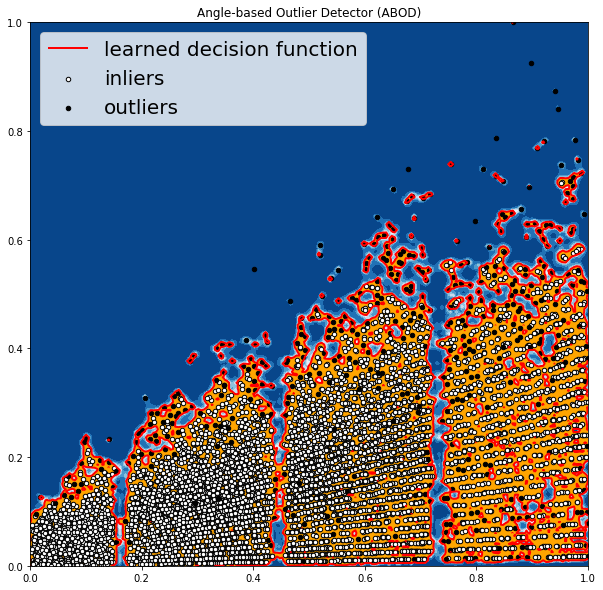

OUTLIERS :  427 INLIERS :  8096 Cluster-based Local Outlier Factor (CBLOF)


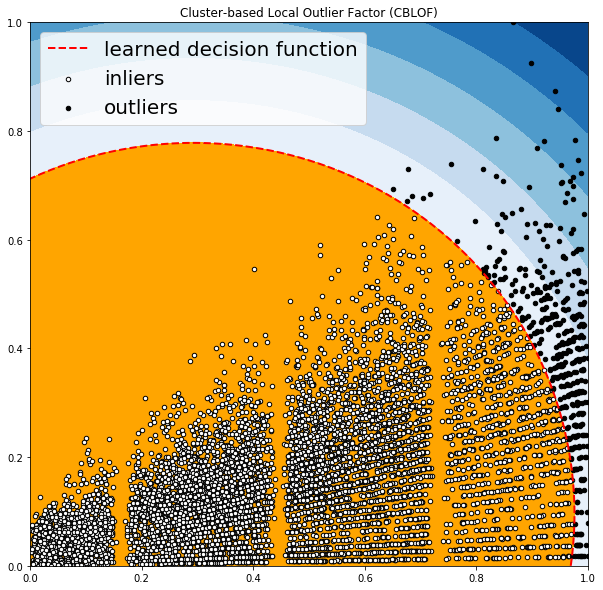

OUTLIERS :  340 INLIERS :  8183 Feature Bagging


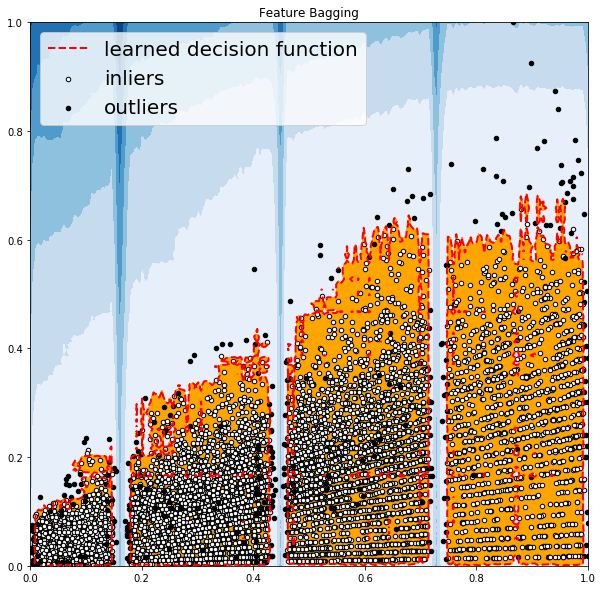

OUTLIERS :  501 INLIERS :  8022 Histogram-base Outlier Detection (HBOS)


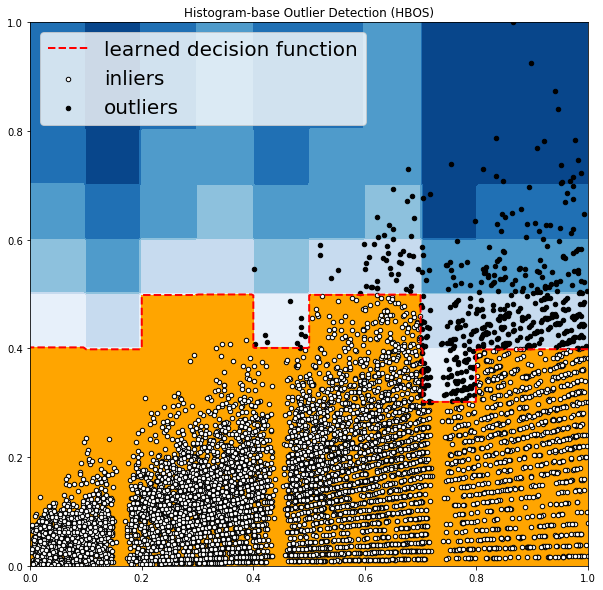

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


OUTLIERS :  427 INLIERS :  8096 Isolation Forest


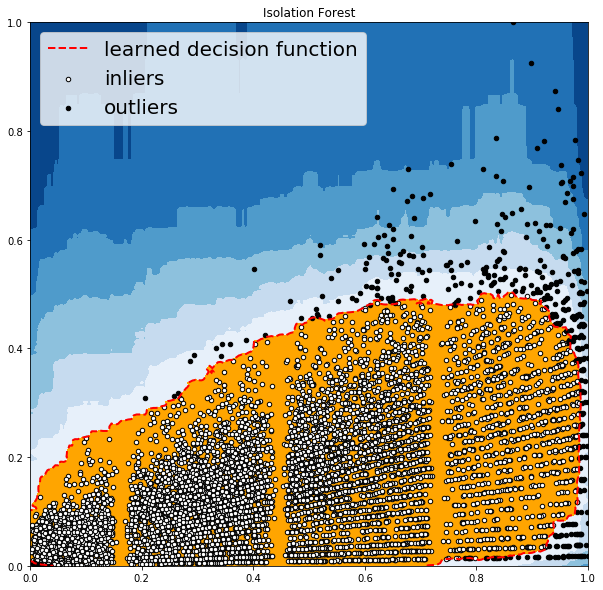

OUTLIERS :  311 INLIERS :  8212 K Nearest Neighbors (KNN)


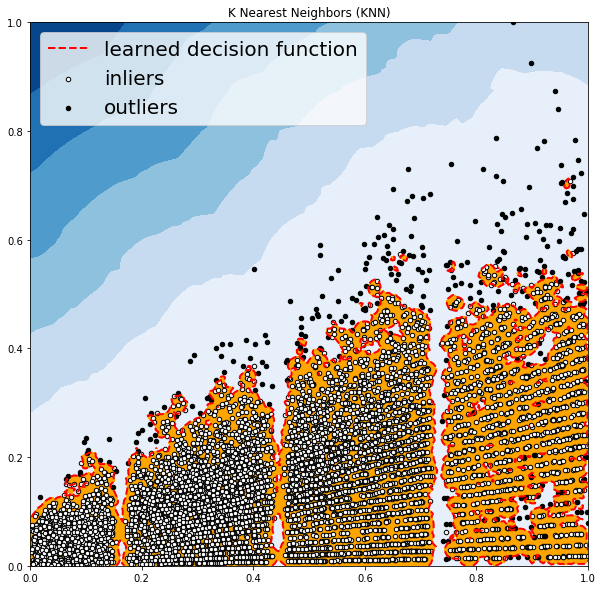

OUTLIERS :  176 INLIERS :  8347 Average KNN


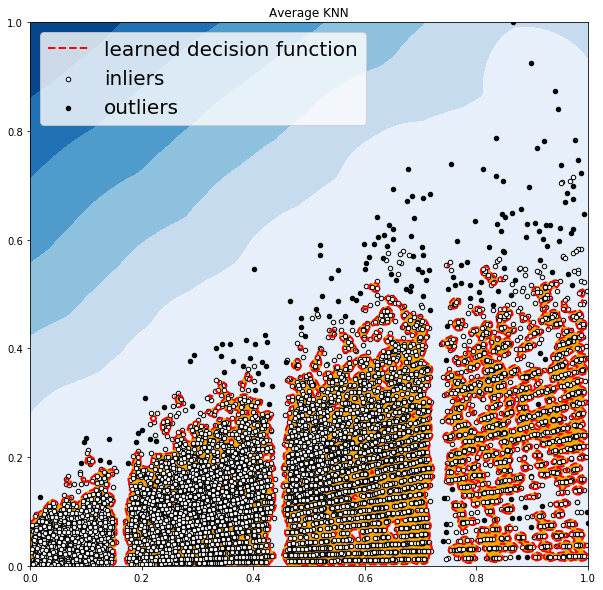

In [28]:
xx , yy = np.meshgrid(np.linspace(0,1 , 200), np.linspace(0, 1, 200))

for i, (clf_name, clf) in enumerate(classifiers.items()):
    clf.fit(X)
    # predict raw anomaly score
    scores_pred = clf.decision_function(X) * -1
        
    # prediction of a datapoint category outlier or inlier
    y_pred = clf.predict(X)
    n_inliers = len(y_pred) - np.count_nonzero(y_pred)
    n_outliers = np.count_nonzero(y_pred == 1)
    plt.figure(figsize=(10, 10))
    
    # copy of dataframe
    dfx = df
    dfx['outlier'] = y_pred.tolist()
    
 # IX1 - inlier feature 1,  IX2 - inlier feature 2
    IX1 =  np.array(dfx['Item_MRP'][dfx['outlier'] == 0]).reshape(-1,1)
    IX2 =  np.array(dfx['Item_Outlet_Sales'][dfx['outlier'] == 0]).reshape(-1,1)
    
    # OX1 - outlier feature 1, OX2 - outlier feature 2
    OX1 =  dfx['Item_MRP'][dfx['outlier'] == 1].values.reshape(-1,1)
    OX2 =  dfx['Item_Outlet_Sales'][dfx['outlier'] == 1].values.reshape(-1,1)
         
    print('OUTLIERS : ',n_outliers,'INLIERS : ',n_inliers, clf_name)
       
    # threshold value to consider a datapoint inlier or outlier
    threshold = stats.scoreatpercentile(scores_pred,100 * outliers_fraction)
        
    # decision function calculates the raw anomaly score for every point
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
    Z = Z.reshape(xx.shape)
          
    # fill blue map colormap from minimum anomaly score to threshold value
    plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),cmap=plt.cm.Blues_r)
        
    # draw red contour line where anomaly score is equal to thresold
    a = plt.contour(xx, yy, Z, levels=[threshold],linewidths=2, colors='red')
        
    # fill orange contour lines where range of anomaly score is from threshold to maximum anomaly score
    plt.contourf(xx, yy, Z, levels=[threshold, Z.max()],colors='orange')
        
    b = plt.scatter(IX1,IX2, c='white',s=20, edgecolor='k')
    
    c = plt.scatter(OX1,OX2, c='black',s=20, edgecolor='k')
       
    plt.axis('tight')  
    
    # loc=2 is used for the top left corner 
    plt.legend(
        [a.collections[0], b,c],
        ['learned decision function', 'inliers','outliers'],
        prop=matplotlib.font_manager.FontProperties(size=20),
        loc=2)
      
    plt.xlim((0, 1))
    plt.ylim((0, 1))
    plt.title(clf_name)
    plt.show()